In [1]:
# From Diego's script fakequake2homogenous.py

import numpy as np
from mudpy import view
import os
from pyproj import Geod

/Users/sydneydybing/opt/anaconda3/envs/mudpy/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
# path = '/Users/sydneydybing/SW4/strain/experiments/'
path = '/Users/sydneydybing/SW4/strain/experiments/realistic_eq_sizes/'
files_list = os.listdir(path)
# print(files_list)

rupts_list = []
for file in files_list:
    if file[-4:] == 'rupt':
        rupts_list.append(file)

print(rupts_list)

['fq_M7.000000.rupt', 'fq_M8.000000.rupt', 'fq_M6.000000.rupt', 'fq_M5.000000.rupt']


In [6]:
rupt_params = np.load(path + 'rupture_params.npy')
print(rupt_params[:,0])

# 0. Mw
# 1. Length (km)
# 2. Average slip (m)
# 3. Rise time (s)


[5. 6. 7. 8.]


[[ 7.         58.88436554  0.95499259  2.54185048]]
Log file rupture velocity: 2.71 km/s
Log file Mw: 7.0
Log file hypocenter: (-117.6204, 35.7793), 7.5 km deep
Average slip: 0.9549925860214349
Rise time: 2.5418504780075373



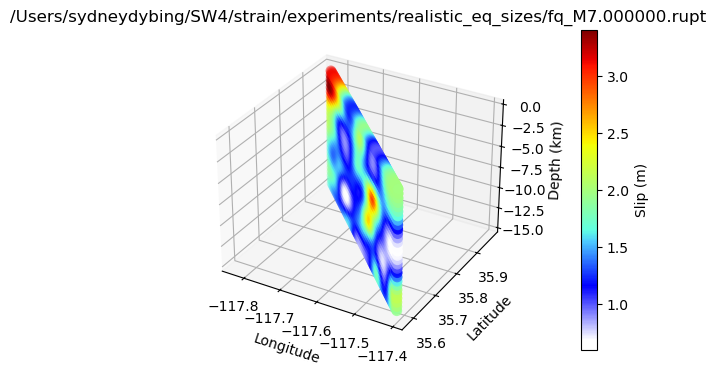

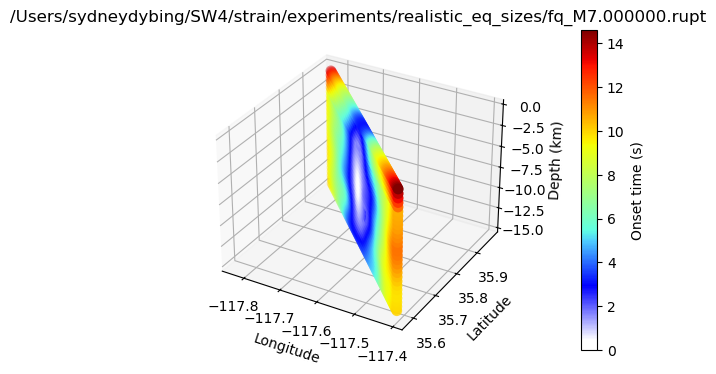

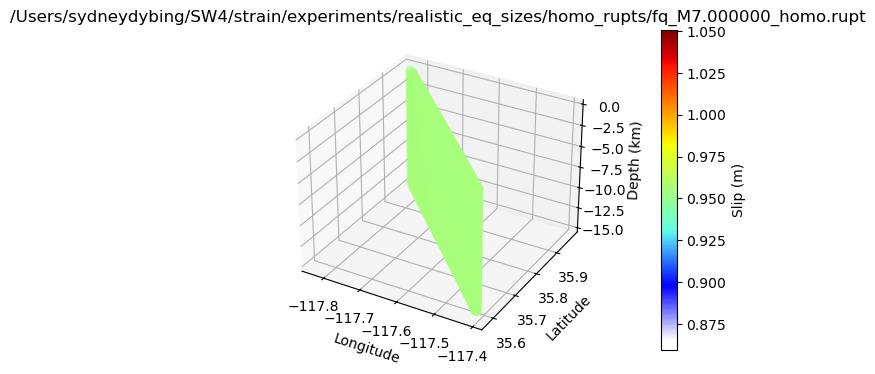

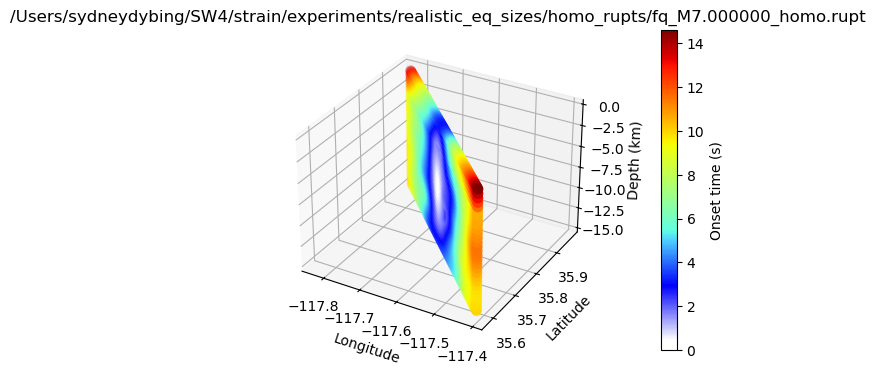

-------------------------------------------------------------
[[  8.         245.47089157   7.58577575   6.99278217]]
Log file rupture velocity: 2.77 km/s
Log file Mw: 8.0
Log file hypocenter: (-117.6204, 35.7793), 7.5 km deep
Average slip: 7.585775750291836
Rise time: 6.9927821719719825



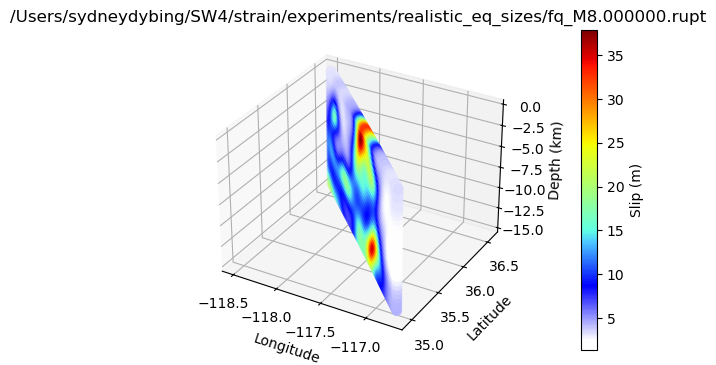

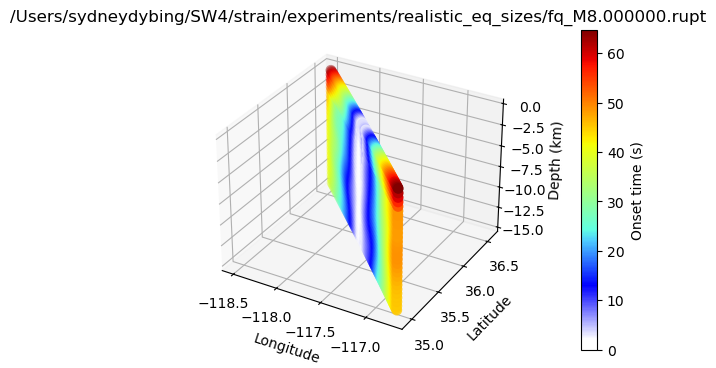

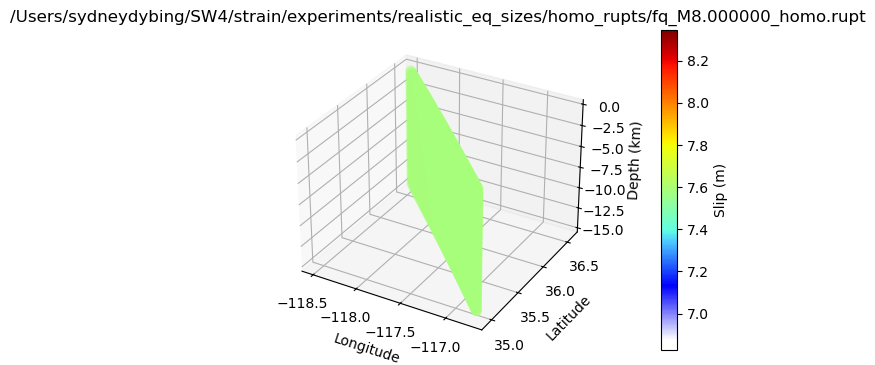

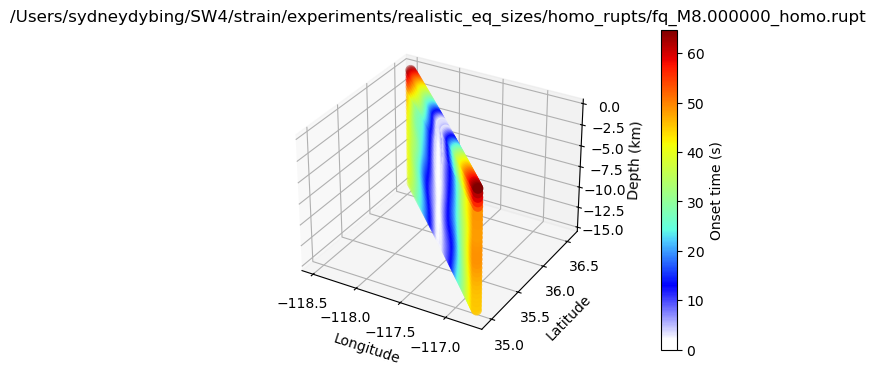

-------------------------------------------------------------
[[ 6.         14.12537545  0.12022644  0.92395326]]
Log file rupture velocity: 2.7 km/s
Log file Mw: 6.0
Log file hypocenter: (-117.6204, 35.7793), 7.5 km deep
Average slip: 0.12022644346174131
Rise time: 0.9239532554644287



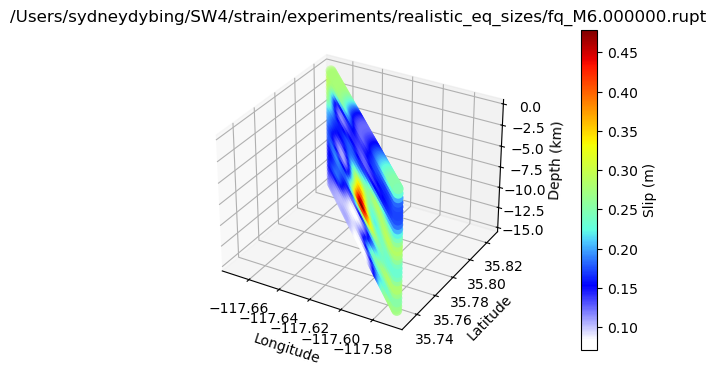

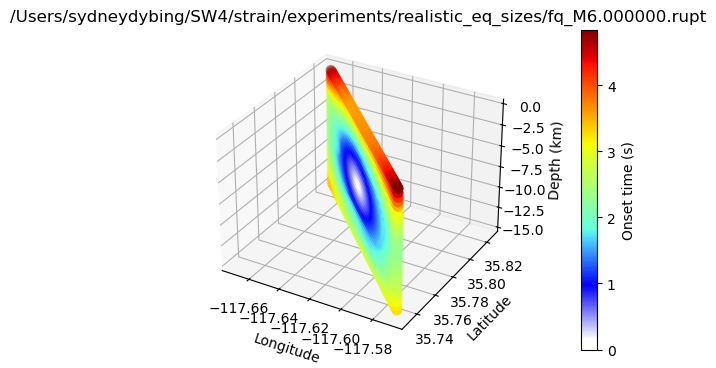

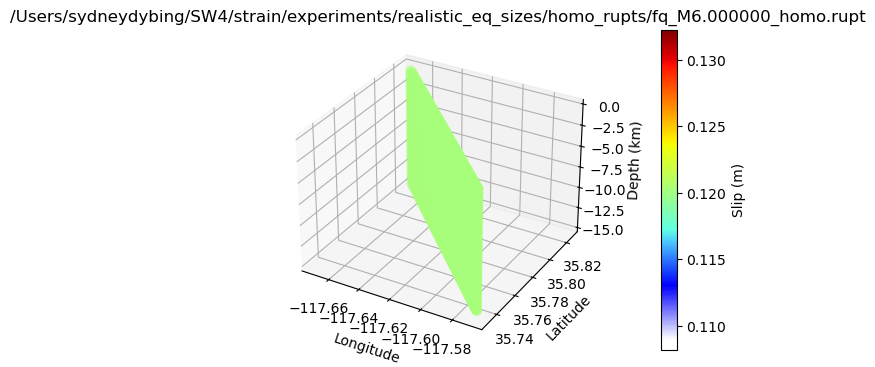

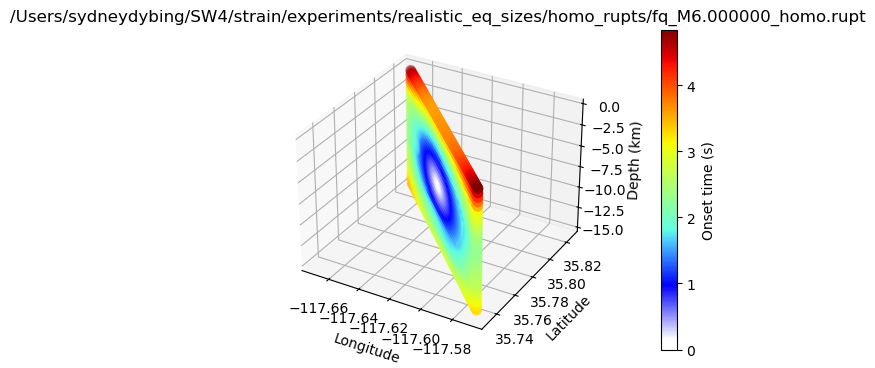

-------------------------------------------------------------
[[5.         3.38844156 0.01513561 0.33585359]]
Log file rupture velocity: 2.73 km/s
Log file Mw: 5.0
Log file hypocenter: (-117.6204, 35.7793), 7.5 km deep
Average slip: 0.015135612484362071
Rise time: 0.3358535939346415



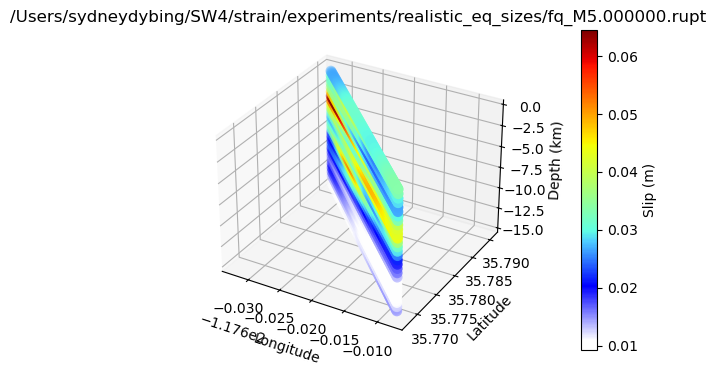

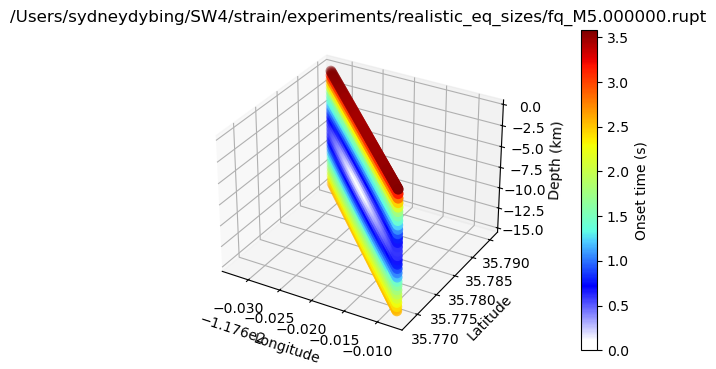

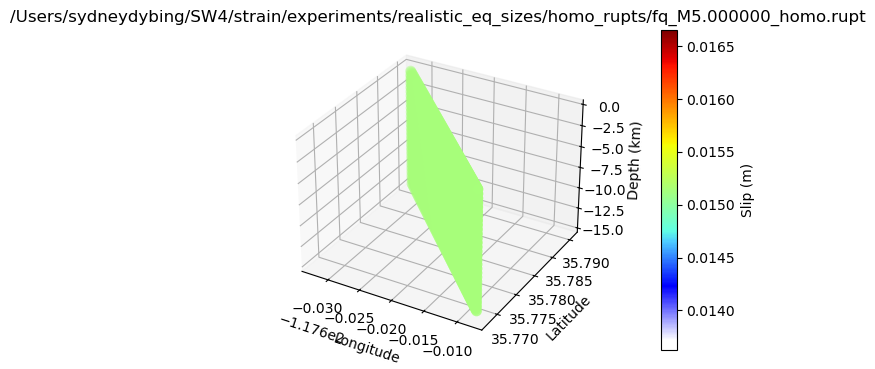

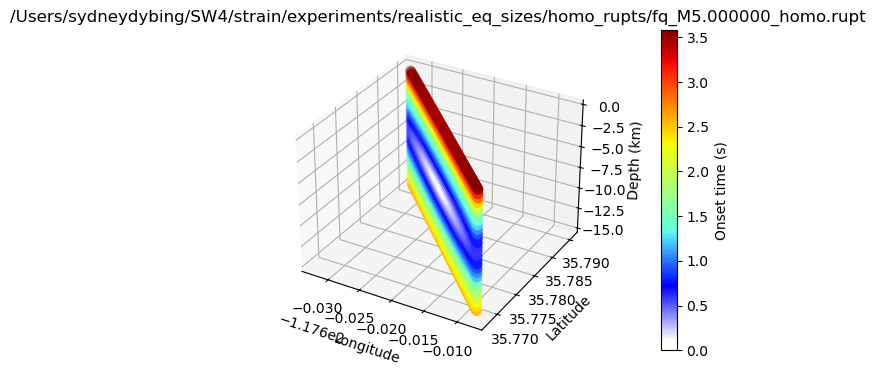

-------------------------------------------------------------


In [10]:
for rupt in rupts_list:
    
    rupt_name = rupt.split('.rupt')[0]
    # print(rupt_name)
    
    rupture = np.genfromtxt(path + rupt_name + '.rupt')
    log = open(path + rupt_name + '.log', 'r')

    while True:
        line = log.readline()
        if 'Hypocenter (lon,lat,z[km])' in line:
            orig_hypo = line.split(':')[1].split(',')
            orig_hypo_lon = float(orig_hypo[0].split(' (')[1])
            orig_hypo_lat = float(orig_hypo[1])
            orig_hypo_depth = float(orig_hypo[2].split(')')[0])
        if 'Average Rupture Velocity (km/s):' in line:
            v_rupt = float(line.split(': ')[1])
        if 'Actual magnitude' in line:
            Mw = float(line.split()[-1])
        elif line == '':
            break
    log.close()
    
    # Get values from rupture parameters file
    i = np.where(rupt_params[:,0] == Mw)[0]
    # print(rupt_params[i])
    slip = rupt_params[i,2][0]
    rise_time = rupt_params[i,3][0]
        
    print('Log file rupture velocity: ' + str(round(v_rupt,2)) + ' km/s')
    print('Log file Mw: ' + str(Mw))
    print('Log file hypocenter: (' + str(orig_hypo_lon) + ', ' + str(orig_hypo_lat) + '), ' + str(orig_hypo_depth) + ' km deep')
    print('Average slip: ' + str(slip))
    print('Rise time: ' + str(rise_time))
    
    print('')

    # Replace heterogeneous slip and rise time with the homogeneous values
    rupture[:,7] = rise_time # dura column: rise time
    rupture[:,8] = slip # ss-slip column: Ridgecrest is mostly strike-slip
    rupture[:,9] = 0 # ds-slip column
    
    # Save new homogeneous .rupt
    out_file = path + 'homo_rupts/' + rupt_name + '_homo.rupt'
    formatter = "%d\t%.6f\t%.6f\t%.4f\t%.2f\t%.2f\t%.1f\t%.9e\t%.4e\t%.4e\t%.2f\t%.2f\t%.9e\t%.6e\t%.6f"
    np.savetxt(out_file, rupture, fmt = formatter)
    
    # Original rupture
    view.slip3D(rupt = path + rupt_name + '.rupt')
    view.slip3D(rupt = path + rupt_name + '.rupt', plot_onset = True)
    
    # Homogeneous rupture
    view.slip3D(rupt = path + 'homo_rupts/' + rupt_name + '_homo.rupt')
    view.slip3D(rupt = path + 'homo_rupts/' + rupt_name + '_homo.rupt', plot_onset = True)
    
    print('-------------------------------------------------------------')